# NYC Taxi Trip Duration

### DOMAIN: Transportation

**By Gaurav Padawe** - 26th April, 2019

### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.

## Table of Contents

**Information**
    - Reason for Choosing this Dataset ?
    - Details
    - Source
    - Attribute Info
    - Objective
    - Evaluation Metric
    - Questions Arising
    - Architecture


**Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype & Null values


**Initial Exploratory Data Analysis & Data Preprocessing**
    - EDA (Phase 1)
    - Label Encoding
    - Descriptive Statistics
    - EDA (Phase 2)
    - Geo-Spatial Analysis


4. **Feature Engineering**
    - Feature Extraction
    - Post Feature Extraction EDA
    - Correlation Heatmap
    - Dropping unwanted features


**Normalization**


**The First Approach - Decomposition**
    - Principal Component Analysis (PCA)
    - Splitting Data & Choosing Algorithms
    - Linear Regression Implementation
    - Decision Tree Implementation
    - Random Forest Implementation
    - Evaluating Metrics (R2 and RMSLE)


**The Second Approach - Without Decomposition**
    - Splitting Data & Choosing Algorithms
    - Linear Regression Implementation
    - Decision Tree Implementation
    - Random Forest Implementation
    - Evaluating Metrics (R2 and RMSLE)


**What's better - Decision Tree or Random Forest ?**


**Insights**


**Recommended Approach**


**What's next ?**

# Details :

The dataset is based on the **2016 NYC Yellow Cab trip record** data made available in **Big Query** on **Google Cloud Platform**. The data was originally published by the **NYC Taxi and Limousine Commission (TLC)**. The data was sampled and cleaned for the purposes of this playground. Based on individual trip attributes, should predict the duration of each trip.

# Source:

- **NYC Taxi and Limousine Commission (TLC)** : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml


- **Download Data :** https://drive.google.com/open?id=1OyOC9y2x4uyT7drXJBOEZ2yRBktiQB8H


- **Kaggle** : https://www.kaggle.com/c/nyc-taxi-trip-duration/data

# Attribute Info

File descriptions
●	train.csv - the dataset (contains 1458644 trip records)


Data fields

●	id - a unique identifier for each trip

●	vendor_id - a code indicating the provider associated with the trip record

●	pickup_datetime - date and time when the meter was engaged

●	dropoff_datetime - date and time when the meter was disengaged

●	passenger_count - the number of passengers in the vehicle (driver entered value)

●	pickup_longitude - the longitude where the meter was engaged

●	pickup_latitude - the latitude where the meter was engaged

●	dropoff_longitude - the longitude where the meter was disengaged

●	dropoff_latitude - the latitude where the meter was disengaged

●	store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

●	trip_duration - duration of the trip in seconds

# Evaluation Metric

- The evaluation metric for this competition is Root Mean Squared Logarithmic Error.


- The RMSLE is calculated as

![alt text](https://i.stack.imgur.com/952Ox.png)

Where:

    - ϵ is the RMSLE value (score)
    - n is the total number of observations in the (public/private) data set,
    - pi is your prediction of trip duration, and
    - ai is the actual trip duration for i. 
    - log(x) is the natural logarithm of x

# Objective:

**To Explore various attributes and build a Predictive model that predicts the total trip duration of taxi trips in New York City.**

# Questions Arising:


    - What types of Variables do we have ?
    - Are there any False trips or Invalid data point which exceeds Trip Duration well above impossibility ?
    - What’s the most frequent travelled destination ?


And much more to know as we continue with our Analysis. 

# Architecture

![alt text](https://ro61zg.dm.files.1drv.com/y4mJQqvWURFazS5CdRzm9D0mMvHerP2l7LESYzeN6Z0pnzFIg9yEU3Fb3-E_BuQxWKUMVQ8Bc0gd3cLSldXAmre7JIs3wB2rLfL-CPidsBz0FeYi_jyNGdMipTFfOBiuEZq5YQZqqrSPCGy9KgOjrvStnCW_a94ai-YKUsWtGmTNH09Y4bk-EeGAgS96L4tAcBI1m_RnVKKv7A_rDapiQlRsw?width=1092&height=542&cropmode=none)

# Loading Dataset

In [0]:
#importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#reading dataset

df = pd.read_csv("train.csv", header=0, parse_dates=True)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Findings

- DateTime columns for Pickup and Dropoff which needs **Feature extraction** as there might be lots of hidden info.


- We also have **Geo-Spatial data** which we can plot using Visualization tools like **Tableau, PowerBI, QlikView, etc**

In [0]:
#Shape of data

print ('No. of Examples : ',df.shape[0])
print ('No. of Features : ', df.shape[1])

No. of Examples :  1458644
No. of Features :  11


# Checking for Dtype and Null Values

In [0]:
#Attribute information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [0]:
#checking missing values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

- Quite good that our Dataset has no NULL values !!

# EDA & Data Preprocessing

Text(0.5, 1.0, 'Vendor ID')

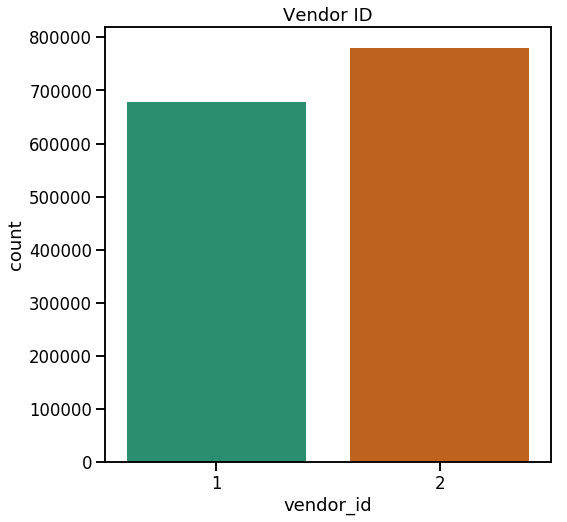

In [0]:
#vendor_id - a code indicating the provider associated with the trip record

sns.set_context('talk')

plt.figure(figsize=(8,8))
sns.countplot(df['vendor_id'], palette='Dark2')
plt.title("Vendor ID")

- From Above Visualization, we can say that there are **2 vendors** (Service Providers).


- 2nd Service provider is the most opted one by New Yorkers.

Text(0.5, 1.0, 'Store and Forward Flag')

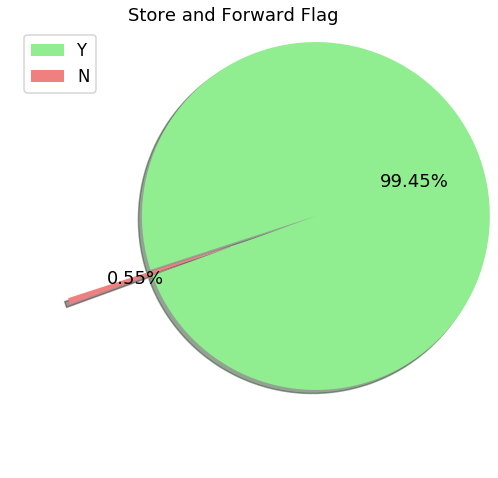

In [0]:
#Store & Forward flag

plt.figure(figsize=(8,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip.


- Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server.

In [0]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

#df['vendor_id'] = df['vendor_id'].astype('category')
#df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

- Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease.


- We can convert these features into “category” type by function called “astype(‘category’)” that will speed up the Computation. Since, my plan is to go with PCA for dimension reduction, I’m not going with that approach.

# Descriptive Statistics

Text(0.5, 1.0, 'Descriptive Stats')

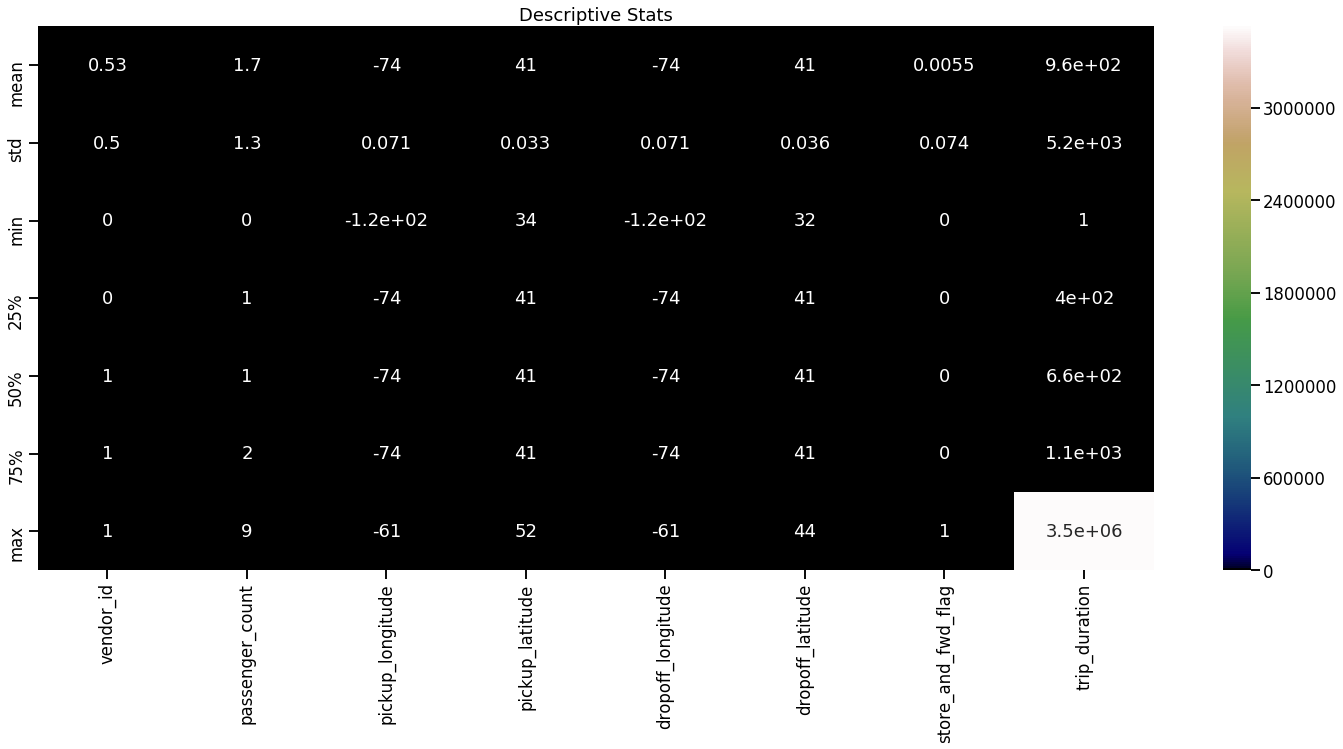

In [0]:
#Descriptive Stats

plt.figure(figsize=(25,10))
sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth')
plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

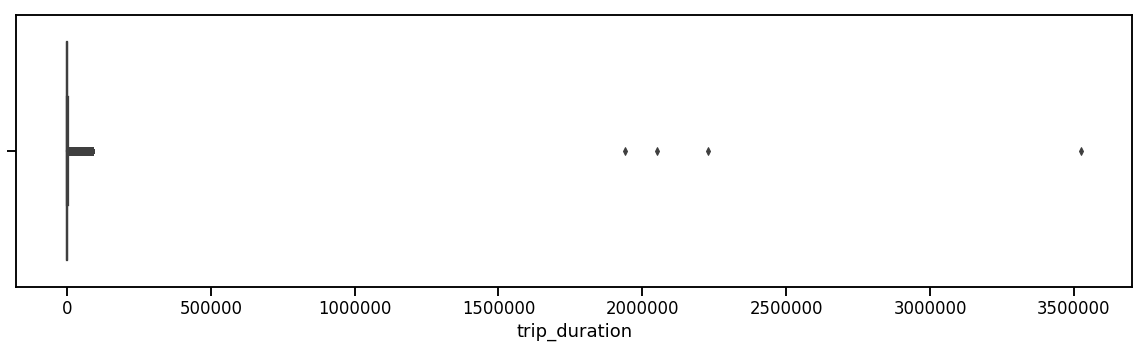

In [0]:
#Visualising Trip duration we can clearly notice few outliers at extreme right

plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

- Probably in this visualization we can clearly see some outliers , their trips are lasting between 1900000 seconds (528 Hours) to somewhere around 3500000 (972 hours) seconds which is impossible in case of taxi trips , How can a taxi trip be that long ?


- It’s Quite suspicious. We’ll have to get rid of those Outliers.

Text(0.5, 1.0, 'Passenger Count Distribution')

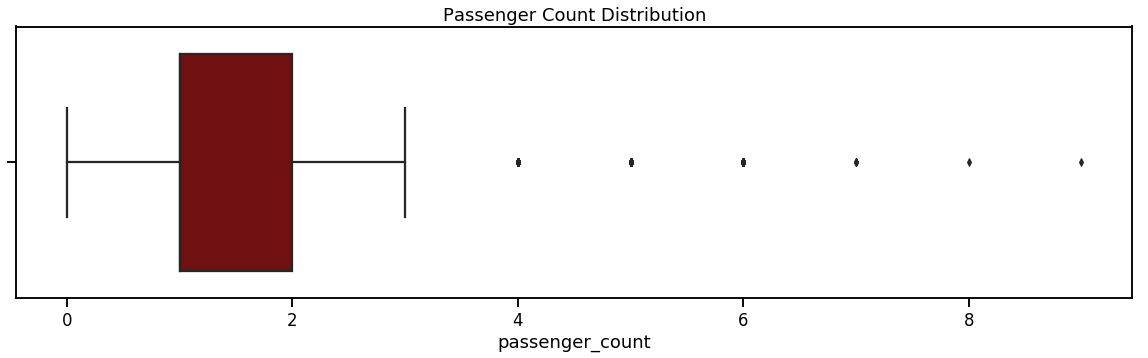

In [0]:
#Spread of Passenger count

plt.figure(figsize=(20,5))
sns.boxplot(df['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

- Most number of trips are done by 1-2 passenger(s).


- But one thing is Interesting to observe, there exist trip with Zero passengers, was that a free ride ? Or just a False data recorded ?


- Above 4 Passengers Indicate that the cab must be larger sized.

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

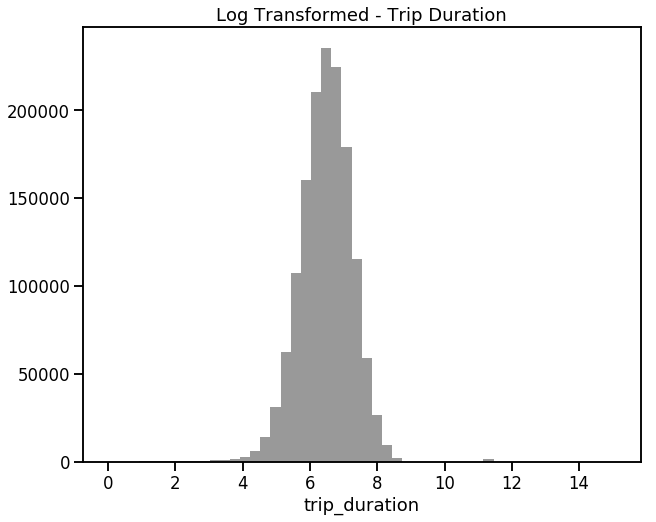

In [0]:
#Log Transformation

plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

- Since our Evaluation Metric is RMSLE, we'll proceed further with Log Transformed "Trip duration".


- Log Transformation Smoothens outliers by proving them less weightage.

# Geo Spatial Data

- Now, we also have Geographical data (Latitude and Longitude) for pickup points and dropoff points.


- You can refer to my Tableau Interactive Visualizations for geographical data analysis here: https://public.tableau.com/profile/gaurav.padawe#!/vizhome/NYCTaxiTripAnalysis2016/NYCTaxi-DropoffPoint


- I had created Interactive dashboard where you can choose filter from "vendor_id", "month" and "hour".


- There are total 2 plots , a 'pickup' and a 'dropoff' point plot.


1) **vendor_id** filter will let you choose the specific service provider and analyse its insights.


2) **month** filter will let you choose specific month to get insights on monthly basis.


3) **hour** filter permits you to observe patterns / trends in trips on hourly basis.

**PICKUP** Points analysis (Screenshot taken of My Tableau Visualization)

![alt text](https://5hcefa.dm.files.1drv.com/y4mcNmW9JPrG-axnLTJkU81Z4AHPyFHfAQJWeigiX62fFf0Mitaw5qWFK9S5ABlTtgp4-iyTkPsN7gGEHLtllUZcvfW6UpHsseZ49ROtoa6UpwUjk4Wzh0f1PSDvuXHEk964W4f3l4VXgBofolMVtE-22UPYKQdREOfQwWj-EOeOYjHnz52NXck_nuV3Uajo561bh-fT-bBKPFY5z8M65PuVw?width=1280&height=574&cropmode=none)

- Pickup Points over the period of time, Apart from Manhattan we’ve some areas where we see most pickups, The **LA Guardia Airport** and **JFK Airport**.

![alt text](https://dnpjqg.dm.files.1drv.com/y4mJLuBY2eVC4QZdX8rMHUtPUN_g63FtPIoU-wXdMO-uFsvQZrUVmFO9si8MBVQDyy8i0znDpgf1NGvoHGNyKyGf4t4MN0CScXPBE15oI-ZOI5ajQaK4Y12r5mQeEropSQtVSlWklVHNysgDn9cmtqtx_OLU9pnVKIOhvY6SXcR6kLcmjttZQNjXfbSEXogmRTeVUp3VmvRNS4yQuwXybDAPQ?width=1280&height=600&cropmode=none)

- Some the pickup points reach far beyond the Land , probably in Sea which is impossible Trip, how can a taxi trip begin in Ocean ?

**DROPOFF** Points Analysis

![alt text](https://cv4ixa.dm.files.1drv.com/y4mhSQmd2iRG_JJOIVy6VIKHUB25jVxaDWW9kEk0c-uwwx4o8HPxjyxeF5RSK_5qIIHTo24s953b2OM6zPzcl8424xlJxmw0MVWQwfghlZldLcJwcF8zOgEb8w_I3wL8ycbOxiENlvAf_vFqZ35_eB321hqneliyJIusa6VAzUyO2zliqisQg3IHuEKhcP6ECM8S4n4nBcpOvcYA4KKqgw9gw?width=1280&height=596&cropmode=none)

- DropOff Points Visualization: Leaving Manhattan area, the place where we see more DropOffs are Airports , The **LA Guardia Airport** and **JFK Airport**.

![alt text](https://fpystg.dm.files.1drv.com/y4mfaqD0WMC_dbfJcozIZU215oas4VFdufobXUd37vVHq5c6abyxK76YH2qHXVOTiWoHCA9SiajPZTrufyKB-EzKAk4pbYaDrvwLFA93M_97TyoHhsKqNkbSPZPDUrPSR3fcpLqSd2WF-JMZg47pDfz04U7uyCGXKyaxRuzpy0eypq4Hhe2yKwhHZTxXFxYMa_G-ixBwMF1ZJcg4Y-Sa0qB_A?width=1280&height=589&cropmode=none)

- It’s evident from the above pickup and dropoff points which lead in the North Atlantic Sea, these are the data points responsible for 350000 seconds (972 Hours) trip duration, we can conclude them as outliers.

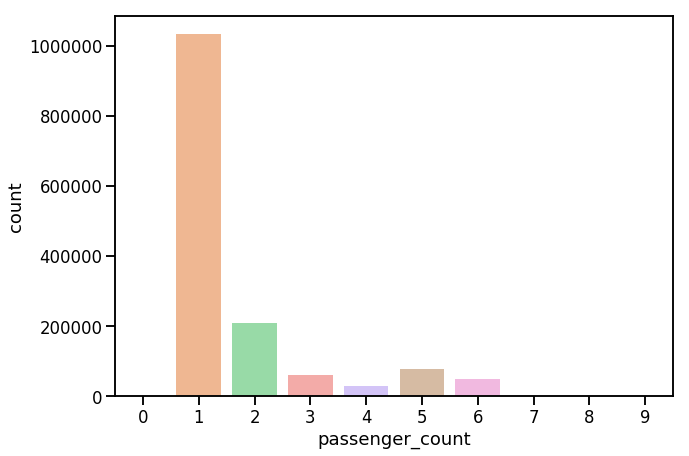

In [0]:
#Passenger count

plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'], palette='pastel')

- Above viz. tells us that there were most number of trips are done by Single passenger.


- 5 - 9 passengers trip states us that cab must be a Large vehicle. 

# Feature Engineering

In [0]:
#Extracting day, month, date, hour, mins, weekday from datetime

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_min'] = df['dropoff_datetime'].dt.minute

- The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features. 


- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them. (For analysis purpose obviosly we can extract)


- Further we can use these columns for Analysis.

Text(0.5, 1.0, 'Overall Monthly trips')

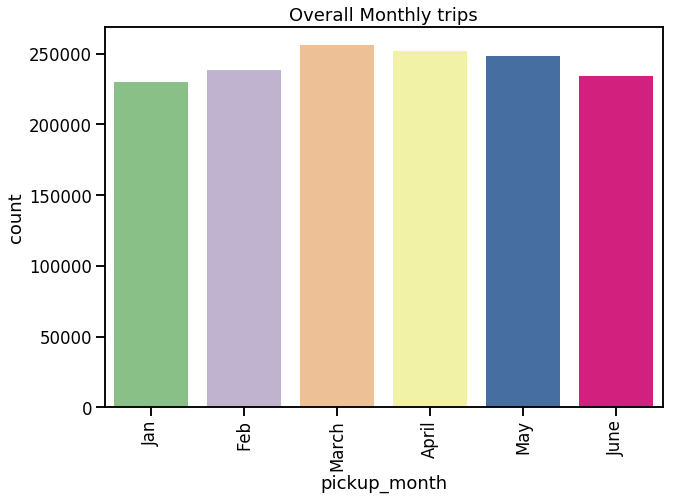

In [0]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

- We've data of 6 months.


- Number of trips in a particular month - March and April marking the highest.


- January being lowest probably due to extreme SnowFall NYC.

Text(0.5, 1.0, 'Hourly Pickups')

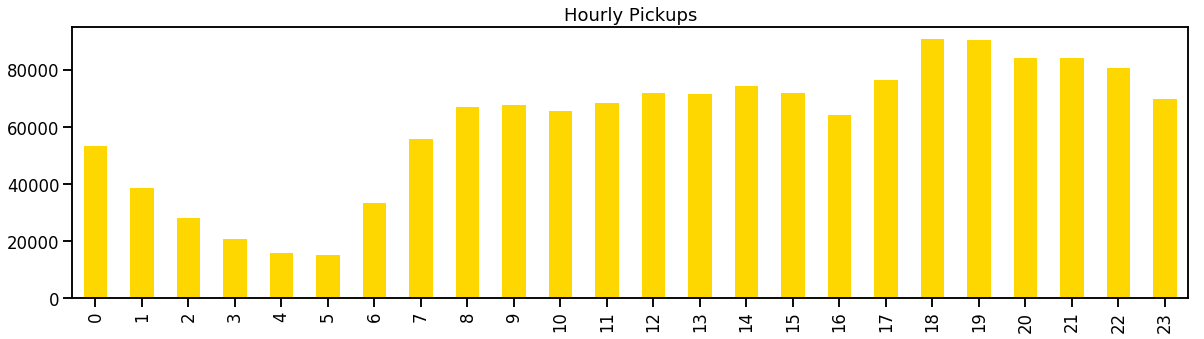

In [0]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")

- In which hour we get to see maximum pickups ? - Rush hours (5 pm to 10 pm), probably office leaving time.

Text(0.5, 1.0, 'Overall Week day Trips')

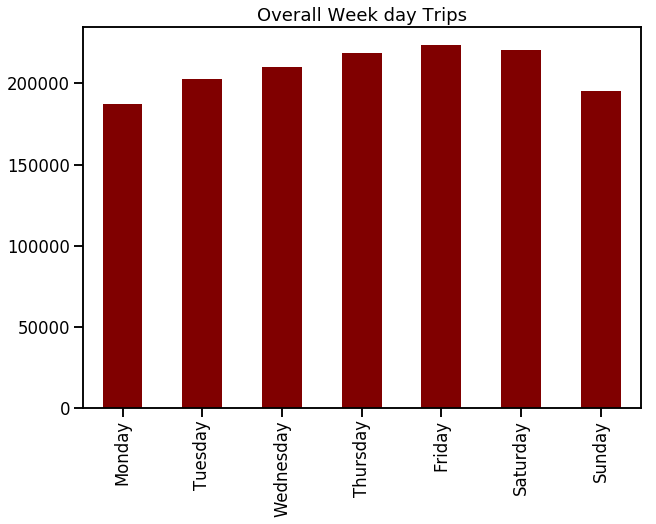

In [0]:
#Analyzing week day trips

plt.figure(figsize=(10,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='maroon')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

- Observations tells us that Fridays and Saturdays are those days in a week when New Yorkers prefer to rome in the city. GREAT !!

Text(0.5, 1.0, 'Daily Trips Plot')

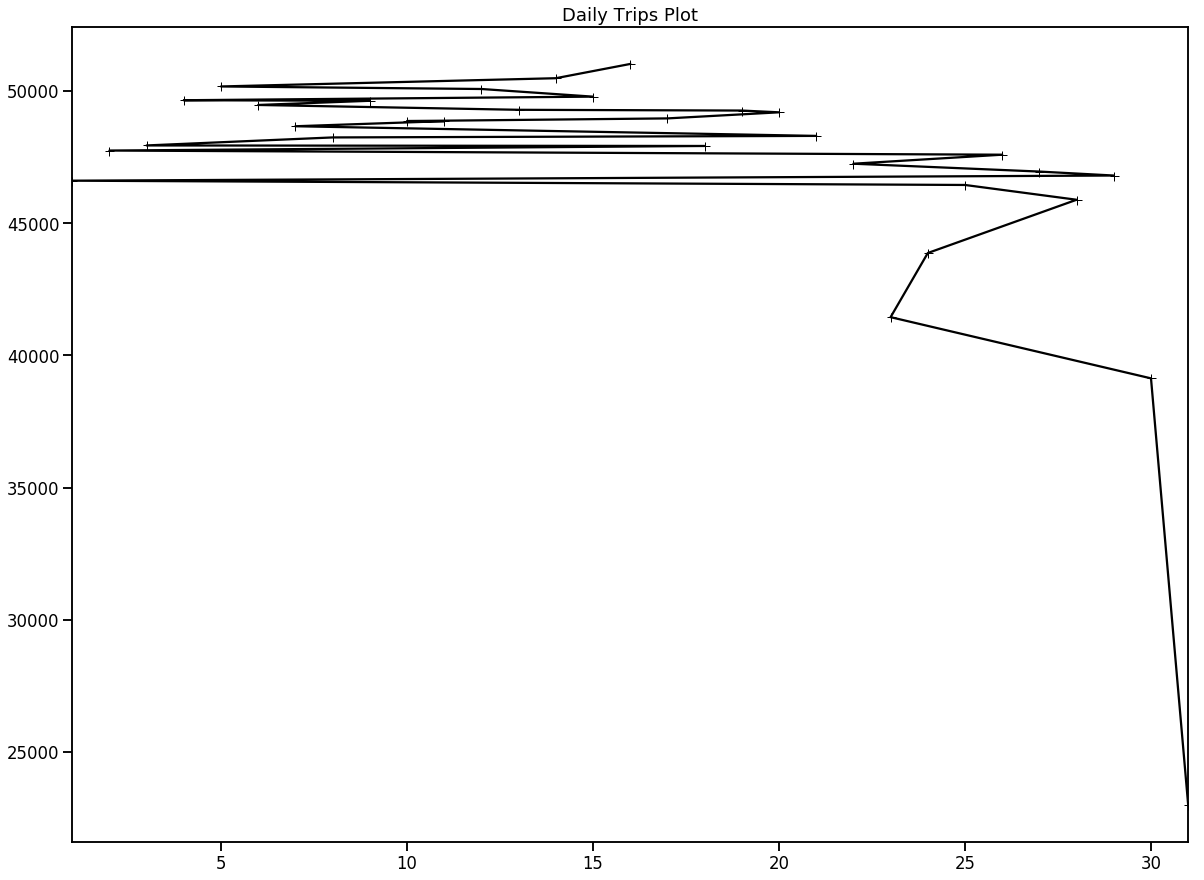

In [0]:
#Examining Daily trip

plt.figure(figsize=(20,15))
df['pickup_day'].value_counts().plot(color="black", marker="+")
plt.title('Daily Trips Plot')

- Seem like New Yorker’s do not prefer to get a Taxi on Month end’s , there is a significant drop in the Taxi trip count as month end’s approach.

# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Plot')

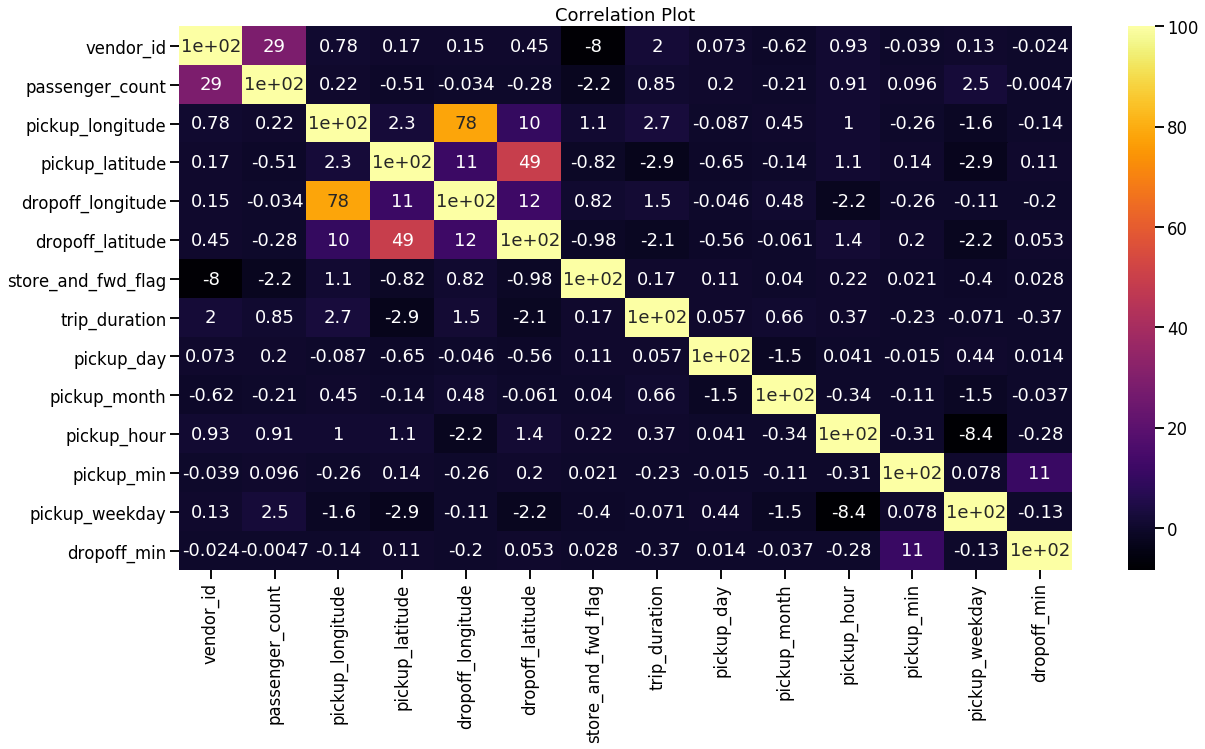

In [0]:
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [0]:
#dropping unwanted columns

nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,17,24,0,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,0,43,6,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,35,1,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,19,32,2,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,13,30,5,38


- Let’s drop unwanted Features like ID and others of which we've already extracted features.

# Normalization

In [0]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [0]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471,-0.172813,-0.307440,0.530263,-0.322670,-1.561062,0.136139
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471,-0.402616,1.477173,-2.126116,0.774030,1.509502,1.399039
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471,0.401692,-1.497182,-0.407283,0.312262,-1.049301,-1.126761
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471,-1.092023,0.287431,0.842778,0.139099,-0.537541,0.537971
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471,1.206001,-0.307440,-0.094768,0.023657,0.997741,0.480566


Normalizing the Dataset using Standard Scaling Technique.


Now, Why Standard Scaling ? Why not MinMax or Normalizer ?


- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.


- While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

# The First Approach - Decomposition using Principal Component Analysis (PCA)

- Now that we’re done, we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.


- Why PCA ? It's a Dimensionality Reduction Technique. It is also a Feature extraction Technique. By PCA we create new features from old (Original) Features but the new features will always be independent of each other. So, its not just Dimensionality Reduction Process, we are even eliminating Correlation between the Variables.


- We'll also go through a approach without using PCA in Second Part and Later compare results with PCA approach.

In [0]:
X = new_df

In [0]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14409795, 0.10874783, 0.10046737, 0.08575584, 0.08327229,
       0.07812324, 0.07600604, 0.0757774 , 0.07020683, 0.06811033,
       0.05427252, 0.03908354, 0.01607881])

<BarContainer object of 13 artists>

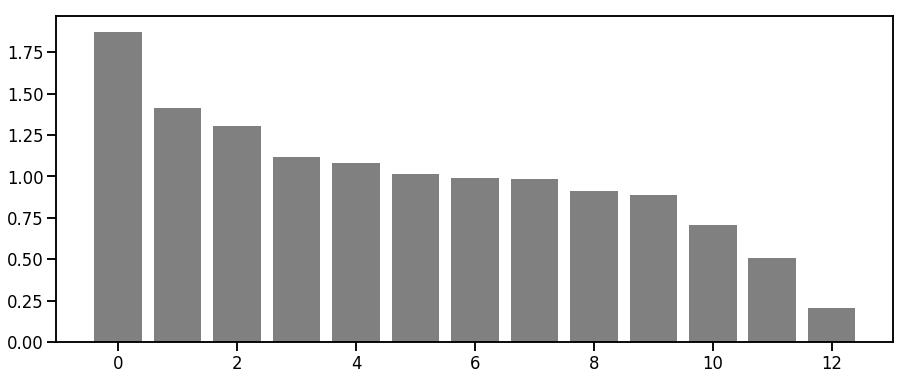

In [0]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

- At 12th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0.5, 1.0, 'Elbow Plot')

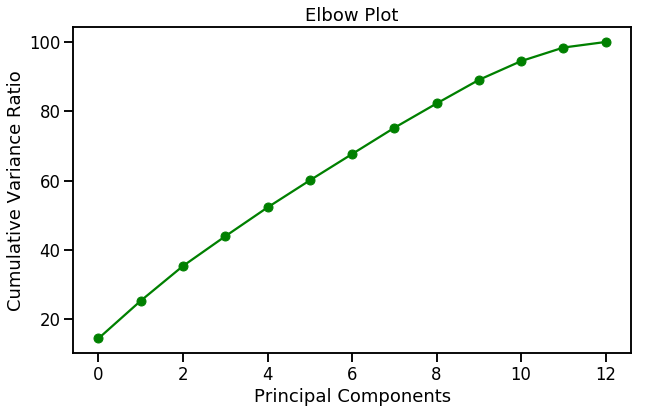

In [0]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [0]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.87327459, 1.4137228 , 1.30607674, 1.11482673, 1.08254045,
       1.01560276, 0.98807923, 0.9851069 , 0.91268938, 0.88543493,
       0.70554326, 0.50808643])

- Above , we had considered 12 as a required number of components and extracted new features by transforming the Data.

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

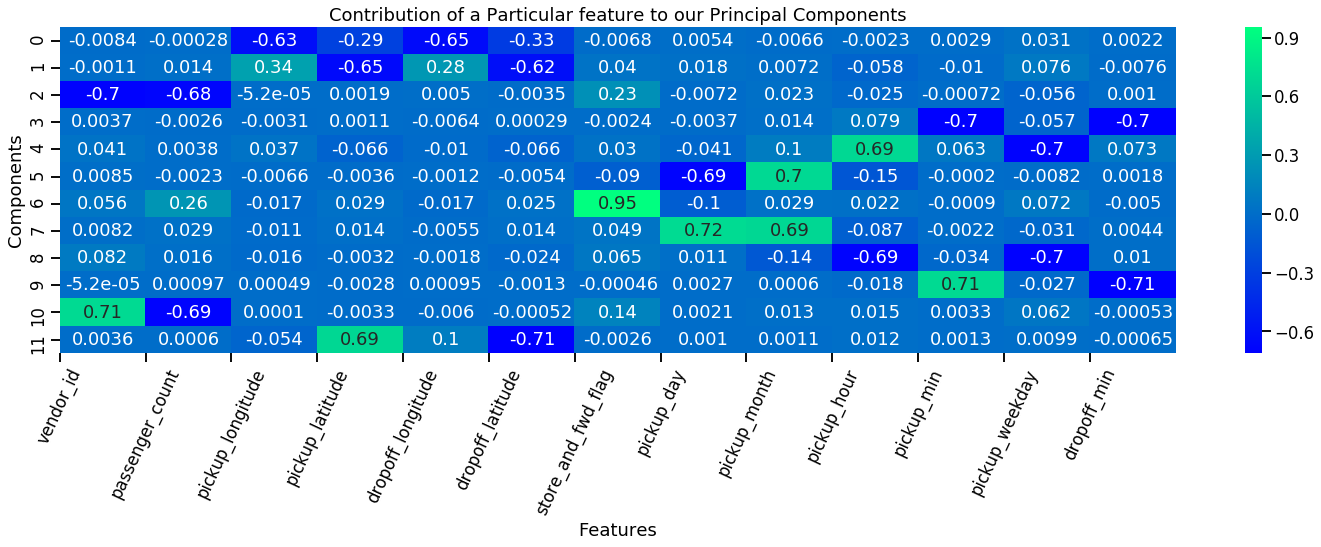

In [0]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

- Above plot gives us detailed idealogy of which feature has contributed more or less to our each Principal Component.


- Pricipal Components are our new features which consists of Information from every other original Feature we have. 


- We reduce the Dimensions using PCA by retaining as much as Information possible. 

# Splitting Data and Choosing Algorithms

- Let’s pass the PCA Transformed data in our Machine Learning Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).

# Why Linear Regression , Decision Tree and Random Forest ?

### Linear regression:

- Simple to explain.


- Model training and prediction are fast.


- No tuning is required except regularization.

### Decision Tree:

- Decision trees are very intuitive and easy to explain.


- They follow the same pattern of thinking that humans use when making decisions.


- Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

### Random Forest:

- It is one of the most accurate learning algorithms available.


- Random Forest consisits of multiple Decision Tress - Results from multiple trees are then merged to give best possible final outcome.


- Random forests overcome several problems with decision trees like Reduction in overfitting.


**So, I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor. Later, we will also approach with same algorithms on "without PCA" data. Finally, we'll evaluate both approaches we took and lay down recommended approach and algorithms.**

In [0]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

- RMSLE as a evaluation Metrics , We can also hyper tune our Parameters to minimize the loss (RMSLE). We will also calculate Null RMSLE , which we can set as a benchmark for our Model's RMSLE.

In [0]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 12), (437594, 12), (1021050,), (437594,))

# Linear Regression

In [0]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.40949572, 6.38974715, 6.58234517, ..., 6.49740393, 6.39593293,
       6.55841163])

In [0]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.464229202317943,
 array([-0.00461807,  0.12447833, -0.01441592,  0.00959972,  0.05385644,
         0.01496158,  0.00788659,  0.02648509, -0.00784727, -0.00447443,
         0.00189097, -0.01348211]))

Interpreting the coefficients:

**Note: The Units / Values can change everytime you run the model freshly.**

- Holding all other Principal Components fixed, a 1 unit increase in 1st PC is associated with a decrease of -0.00461807 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 2nd PC is associated with a increase of 0.12447833 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 3rd PC is associated with a decrease of -0.01441592 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 4th PC is associated with a increase of 0.00959972 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 5th PC is associated with a increase of 0.05385644 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 6th PC is associated with a increase of 0.01496158 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 7th PC is associated with a increase of 0.00788659 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 8th PC is associated with a increase of 0.02648509 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 9th PC is associated with a decrease of -0.00784727 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 10th PC is associated with a decrease of -0.00447443 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 11th PC is associated with a increase of 0.00189097 in Trip Duration.


- Holding all other Principal Components fixed, a 1 unit increase in 12th PC is associated with a decrease of -0.01348211 in Trip Duration.

In [0]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.04244450511791231
Validation Score :  0.04389207995585587
Cross Validation Score :  -0.0485834420026021
R2_Score :  -23.101354376046707


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

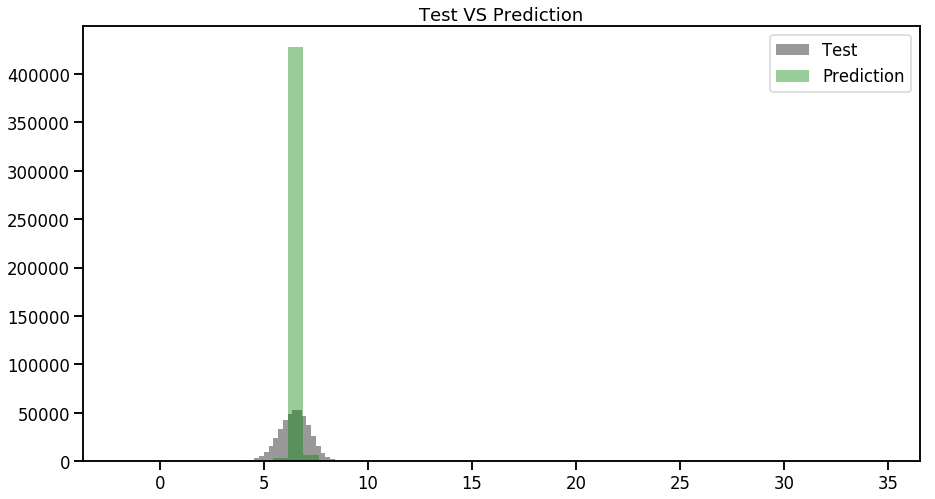

In [0]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in Grey) and Predicted values (in Yellow) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

# Null RMSLE

- Null RMSLE is the RMSLE that could be achieved by predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [0]:
#null rmsle implementation

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.11464018891653321


# Decision Tree

- Let us apply Decision Tree on our data and see what prediction it does

In [0]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.58041548, 7.50469126, 6.16268944, ..., 6.96234437, 7.61373356,
       6.51030877])

In [0]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.9258236409034742
Validation Score :  0.9169703399008267
Cross Validation Score :  0.9137031599395794
R2_Score :  0.9104553280534936
RMSLE :  0.03753845840971528


- Our Goal is to reduce the value of loss function (RMSLE) as much as possible considering NULL RMSLE into account, i.e, 0.1146

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

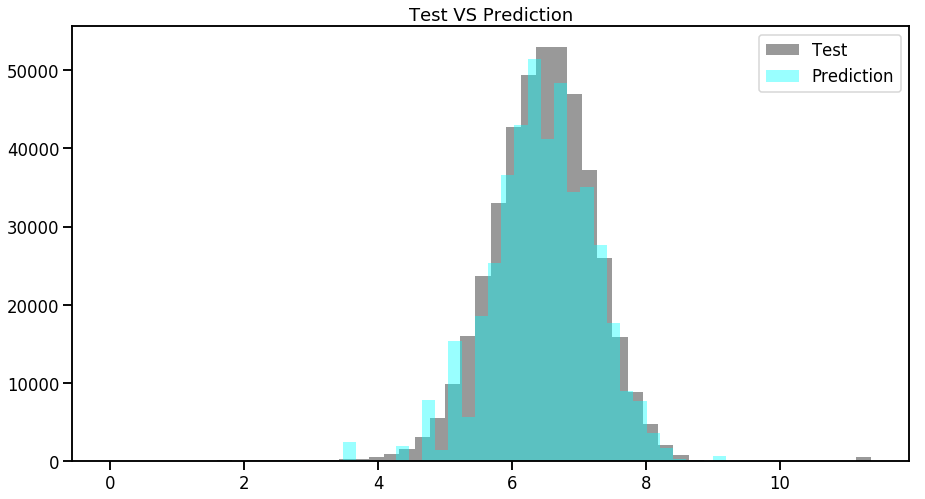

In [0]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

# Parameter Tuning Decision Tree

- We can perform some hyper tuning on our Algorithm to get the most out of it, Hyper Tuning might consume lot of time and resources of the system depending upon the how big the Data we have and what algorithm we're using. It will go through number of Iterations and try to come up with the best possible value for us. 

In [0]:
#hyper parameter tuning

'''params = {'max_depth':[10,11,12,None], "min_samples_split":[2,3,4,5], 'max_features':[2,5,7,10]}

grid = GridSearchCV(est_dt, params, cv=5)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print (grid_pred)
grid.best_params_'''

'params = {\'max_depth\':[10,11,12,None], "min_samples_split":[2,3,4,5], \'max_features\':[2,5,7,10]}\n\ngrid = GridSearchCV(est_dt, params, cv=5)\ngrid.fit(X_train, y_train)\npred = grid.predict(X_test)\nprint (pred)\ngrid.best_params_'

In [0]:
#print ("R2_Score after parameter tuning : ", r2_score(grid_pred, y_test)))

#print ("RMSLE after parameter tuning : ", np.sqrt(mean_squared_log_error(grid_pred, y_test)))

# Random Forest 

- Now, Let us also try Random Forest on our Data and see what do we get.

In [0]:
#random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.57498772, 7.50741749, 6.1581143 , ..., 6.97455472, 7.65248271,
       6.52012103])

In [0]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.930430725446359
Validation Score :  0.924505617325151
Cross Validation Score :  0.9233354598320537
R2_Score :  0.91774951343343
RMSLE :  0.035973787163435474


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

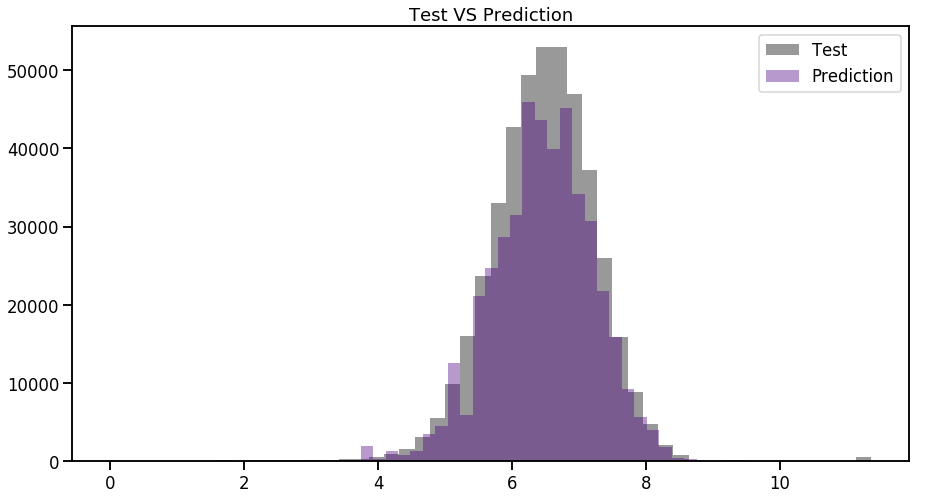

In [0]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.


- Similarly, we can Hyper tune Random Forest to get the most out of it.

# R2 Scores Evaluation

- R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).


- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. 

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

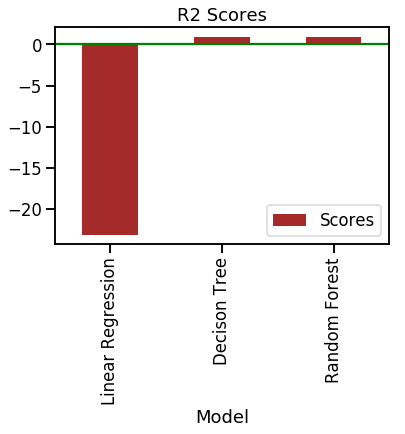

In [0]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

- Although , our Evaluation Metric isn't R2 Score but I'm just plotting them to check the Good Fit.


- We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0 

# RMSLE Evaluation

-  RMSLE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.


- With RMSLE we explicitly know how much our predictions deviate.


- Lower values of RMSLE indicate better fit with lesser LOSS.

![alt text](https://i.stack.imgur.com/952Ox.png)

Text(0.5, 1.0, 'RMSLE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

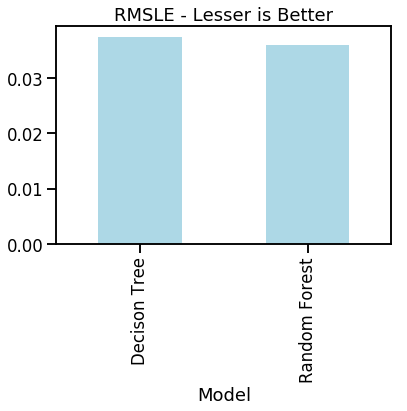

In [0]:
#RMSLE plot

plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="lightblue", legend=False)
plt.title("RMSLE - Lesser is Better")

- Remember our NULL RMSLE : 0.1146 as a benchmark to beat.


- We can observe from above Viz. that our Decision Tree model and Random Forest model are good performers. As, Random Forest is providing us reduced RMSLE, we can say that it's a model to Opt for.

# The Second Approach - Without PCA

- Another approach we could go with is without PCA, just Standard Scaling Dataset and applying our Algorithms.


- The approach can give us better idea of what works better for us.


- This approach might take great amount of computational resources and time, it will be good if we can run this on Google’s Collaboratory, that will eliminate huge computational stress on our system as the program will be running on Cloud.

In [0]:
X = new_df
y = np.log(nyc_taxi_df['trip_duration']).values

# Linear Regression

In [0]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [0]:
#implenting linear regression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.40343909, 6.41676214, 6.59381897, ..., 6.49082468, 6.42025967,
       6.52937071])

In [0]:
#Intercept & Coef

est_lr.intercept_, est_lr.coef_

(6.46424720786789,
 array([ 0.01332765,  0.01305239,  0.08660911, -0.08525532, -0.00461665,
        -0.07103285,  0.01048801,  0.0078414 ,  0.03622542,  0.03069419,
        -0.00763574, -0.02189191, -0.00063054]))

In [0]:
#Examining metrics

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.04347306142666174
Validation Score :  0.04509248495913276
Cross Validation Score :  -0.04870111915032098
R2_Score :  -22.456173569923298


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

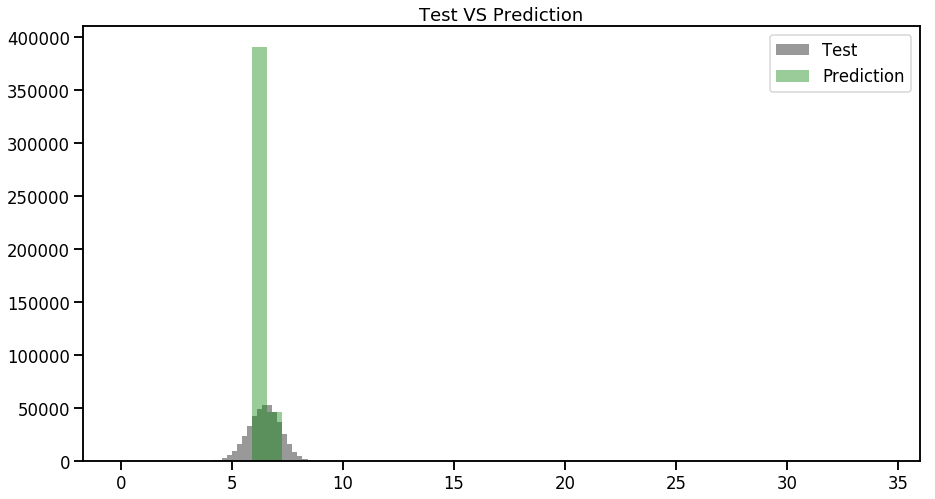

In [0]:
#prediction vs validation data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Observations shows us that Linear Regression isn't performing well even with the second (without PCA) Approach.

# Decision Tree

In [0]:
#decision tree implementation

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.03176878, 7.19731925, 6.45954009, ..., 6.15490363, 7.19731925,
       7.17617183])

In [0]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.4643053926882247
Validation Score :  0.4577777121395722
Cross Validation Score :  0.4575594070764386
R2_Score :  -0.1613305942287775
RMSLE :  0.08784116105584076


- This time our decision tree model is not trained well as we can identify from scores, training score and cross validation score is close to 0.45 compared to last model where it was around 0.92.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

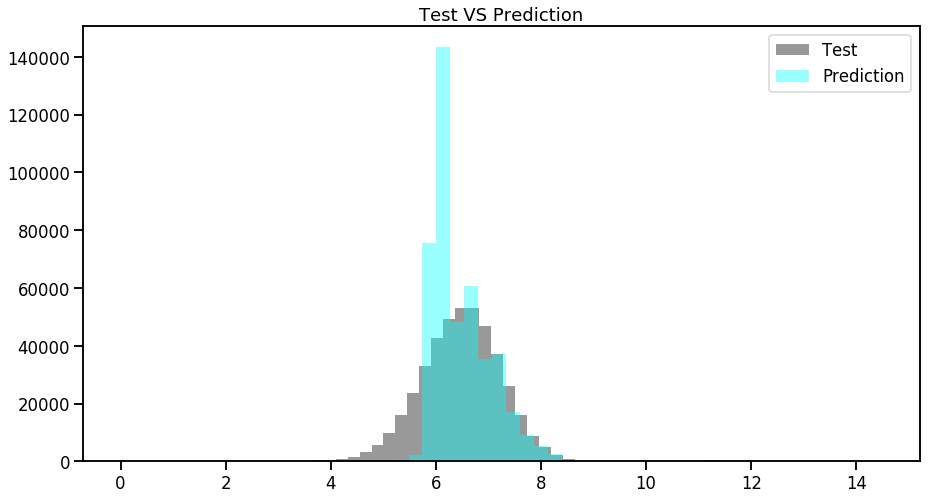

In [0]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Considering our Null RMSLE 0.1146, this model gave us loss of 0.0878, we can say it is good but not the acceptable, knowing the fact that we got RMSLE of 0.037 in previous approach where we applied PCA.

# Random Forest

In [0]:
#implementation of forest algorithm

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.01337121, 7.21180187, 6.27762344, ..., 6.15403702, 7.21180187,
       7.14500027])

In [0]:
#examining metrics

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.4760239771001633
Validation Score :  0.47075518939048056
Cross Validation Score :  0.47265096331351525
R2_Score :  -0.17625343353450984
RMSLE :  0.0870210741271105


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Test VS Prediction')

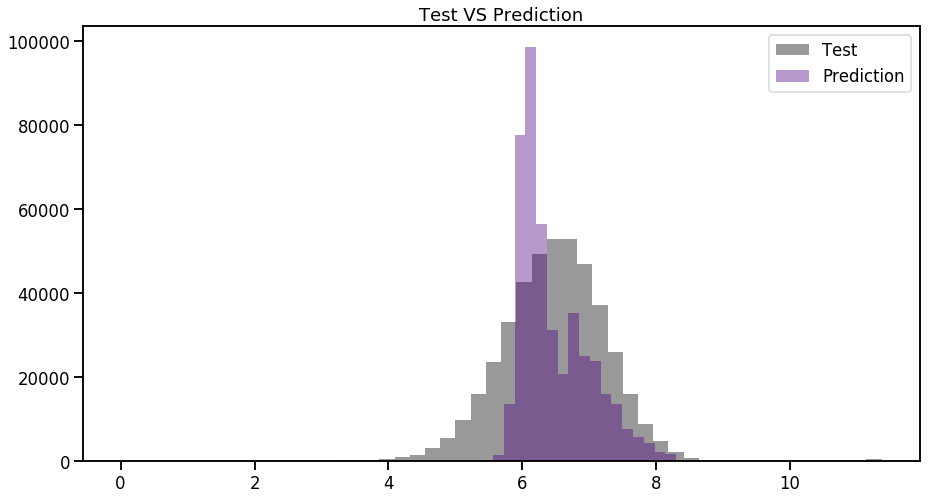

In [0]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- Again the loss value we got here is 0.0870 is good when tried to match with Decision Tree's RMSLE ,i.e, 0.0878. But still could be reduced by PCA Approach or maybe Hyper parameter tuning.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 576x504 with 0 Axes>

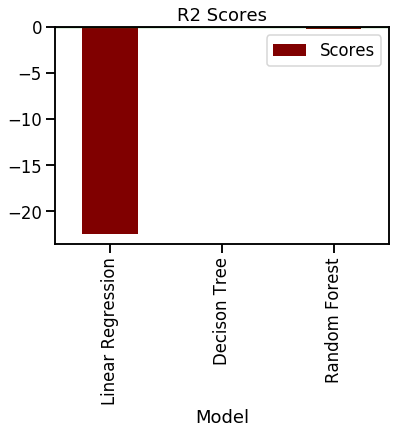

In [0]:
#r2 score plot for all 3 models

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

Text(0.5, 1.0, 'RMSLE - Lesser is Better')

<Figure size 576x504 with 0 Axes>

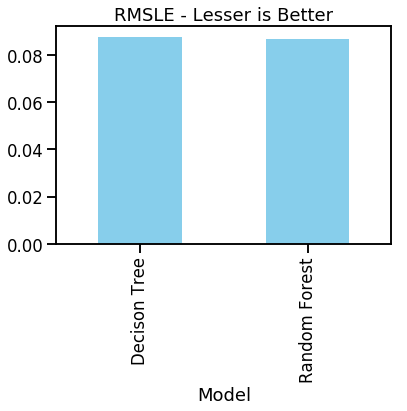

In [0]:
#RMSLE plot

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="skyblue", legend=False)
plt.title("RMSLE - Lesser is Better")

# What's better - Decision Tree or Random Forest ?

- One problem that might occur with Decision Tree is that it can overfit.


- Difference is - A random forest is a collection of decision trees.


- A decision tree model considers all the features which makes it memorize everything, it gets overfitted on training data which couldn't predict well on unseen data.


- A random forest chooses few number of rows at random and interprets results from all the Tress and combines it to get more accurate and stable final result.

# Insights:

- Observed which taxi service provider is most Frequently used by New Yorkers.


- Found out few trips which were of duration 528 Hours to 972 Hours, possibly Outliers.


- With the help of Tableau, we’re able to make good use of Geographical Data provided in the Dataset to figure prominent Locations of Taxi’s pickup / dropoff points.


- Also, found out some Trips of which pickup / dropoff point ended up somewhere in North Atlantic Sea. 


- Passenger count Analysis showed us that there were few trips with Zero Passengers.


- Monthly trip analysis gives us a insight of Month – March and April marking the highest number of Trips while January marking lowest, possibly due to Snowfall.

# Recommended Approach:

- Apply Standard Scaling on the Dataset to Normalize the values.


- Further, Apply PCA to reduce dimensions, as you’ll extract features from our primary DateTime Feature. Those additional features might lead our model to suffer from **“Curse of dimensionality”** and could drastically affect performance.


- Pass the PCA Transformed data in our ML Regression Algorithms and Evaluate results.

# What's Next ?

- Further, one can improve the model's performance using **Hyper-Parameter Tuning.**


- Other ML Algorithms can be Tried. 


- One can take **ANN** approach.